##**機械学習　効果測定（回帰）**




#環境構築

In [1]:
#Google　Driveをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
mkdir data

In [4]:
 cd data

[Errno 2] No such file or directory: 'data'
/content/data



##※ matplotlib日本語化のためのライブラリのインストール
▶ 以下を実行してください。

In [5]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 24.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=d9cc981953eb5b20b35221a97df34a8998705f719bccd1cdd31a9a6e91a70d0c
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


## データ分析対象データ

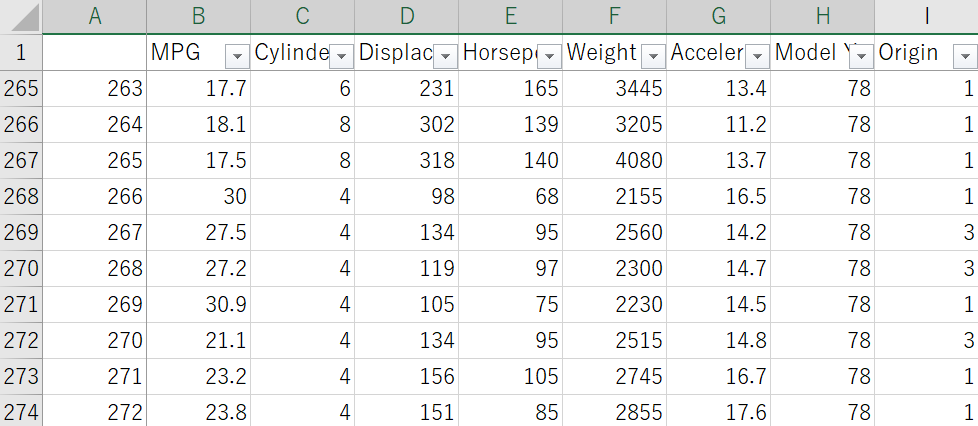

###各種ライブラリのインポートをする

In [6]:
#各種ライブラリのインポートをする
import pandas as pd
%matplotlib inline
import japanize_matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

##1. CSVファイルの読み込みと表示

In [7]:
#csvの読み込み。第２引数に文字コードを指定できる
df = pd.read_csv('auto_mgp.csv',encoding = "sjis")

In [8]:
#読み込まれているか確認
df.head(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1


##2. カテゴリ特徴量があるときはダミー変数化

In [9]:
#今回はカテゴリ特徴量なし
#[Origin]列がカテゴリ特徴量になる可能性はあった。

##3. テストデータの分離 

In [10]:
#テストデータの分離
#訓練データとテストデータの比率は８：２、
#分割する内容が異ならないように乱数シードは０
train_val, test = train_test_split(df,test_size = 0.2,
random_state = 0)

##4.前処理 

4-1.欠損値処理の過程

In [11]:
#欠損値の確認
train_val.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [12]:
#今回、欠損値はさほど多くないが、念のためデータの総数を確認
#データの総数に対してどのくらいの比率で欠損値があるのかを確認
df.shape

(398, 9)

In [13]:
#特定列の穴埋めをしてもよいが、汎用性重視
#最頻値などどのように穴埋めするか次第で変える
train_val_mean = train_val.mean() # 各列の平均値の計算
train_val2=train_val.fillna(train_val_mean) # 平均値で穴埋め
train_val2.head(5)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
64,64,15.0,8,318.0,150.0,4135,13.5,72,1
55,55,27.0,4,97.0,60.0,1834,19.0,71,2
317,317,34.3,4,97.0,78.0,2188,15.8,80,2
102,102,26.0,4,97.0,46.0,1950,21.0,73,2
358,358,31.6,4,120.0,74.0,2635,18.3,81,3


In [14]:
#欠損値の確認
train_val2.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

##4-2.各項目の実施

4-2-1.外れ値の処理

In [15]:
#中級者向け外れ値処理
#マハラノビス距離を計算
from sklearn.covariance import MinCovDet

#数値列を適当に取り出す
df2=df.loc[:,"MPG":"Origin"]
df2=df2.dropna()#欠損値を削除

#df4に対して、各データの中心点からのマハラノビス距離を計算

mcd = MinCovDet(random_state=0,support_fraction=0.7)
mcd.fit(df2)
#マハラノビス距離
distance = mcd.mahalanobis(df2)
distance

array([  9.22085525,  17.08442443,  11.98692273,  10.73649391,
         9.86554151,  58.29033299,  93.89590345,  75.86603861,
       102.87809427,  39.34007674,  37.034303  ,  15.88082903,
        38.91432684, 225.69179835,   8.23895514,   6.35858344,
         5.96019532,   8.29413869,   7.75900602,  13.49028131,
         9.7704735 ,   7.22515555,   9.86834619,  12.6899702 ,
         7.11591806,  51.62195934,  48.49635072,  51.5861775 ,
        60.16480873,   6.69821705,  12.92542179,   7.84653414,
        11.34559546,   5.23962425,   7.54535563,  14.54150936,
         5.0145457 ,   8.60592863,  25.32973885,   7.52864705,
         5.53227325,  21.43495864,  23.67562864,  31.94288513,
        11.46131294,   9.40468887,   8.72708822,  15.1193967 ,
         7.74639916,   6.24590041,  11.96567185,   7.93080262,
        11.2964743 ,  15.78010675,   8.50565226,  17.49910894,
         7.37537889,   7.61238101,  17.17022906,  15.67714171,
         8.08057951,   6.87521596,  25.27390988,   5.53

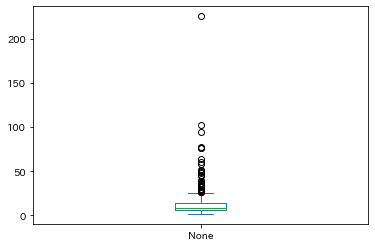

In [16]:
#箱ひげ図で外れ値を見つける
#ひげの外側の〇が外れ値
distance=pd.Series(distance)
distance.plot(kind="box")

In [17]:
tmp=distance.describe()#様々な基本統計量を計算
tmp

count    392.000000
mean      13.164399
std       16.873253
min        1.588986
25%        5.739033
50%        8.191771
75%       13.896683
max      225.691798
dtype: float64

In [18]:
IQR = tmp['75%'] -tmp['25%']#IQR計算
jougen = 1.5*(IQR) + tmp['75%'] # 上限値
kagen = tmp['25%'] -1.5*(IQR) # 下限値

# 上限と下限の条件をもとに、シリーズで条件検索
outliner = distance[ (distance > jougen) | (distance < kagen) ]
outliner

5       58.290333
6       93.895903
7       75.866039
8      102.878094
9       39.340077
10      37.034303
12      38.914327
13     225.691798
25      51.621959
26      48.496351
27      51.586177
28      60.164809
43      31.942885
66      50.193763
69      32.800722
89      39.341522
93      64.128606
94      77.364676
110     28.315387
115     76.676963
123     28.477920
209     32.544535
227     29.647696
229     36.073819
241     26.167812
242     33.432757
261     28.235277
273     28.613012
275     34.130878
297     26.874909
298     32.238110
320     32.832452
323     35.111174
324     44.302097
325     27.378445
331     27.583397
355     26.878267
357     29.316519
359     35.924222
381     46.134526
388     49.385753
dtype: float64

**中央値を使用した場合あまりのも外れ値が多い**
**ので**
**散布図を作成**

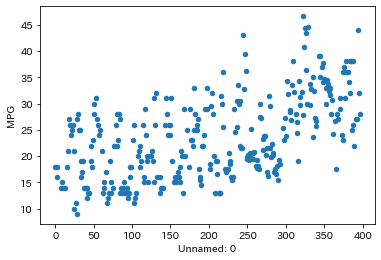

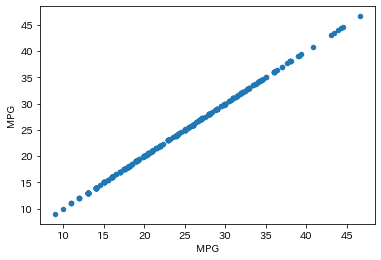

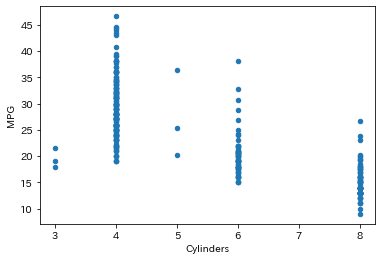

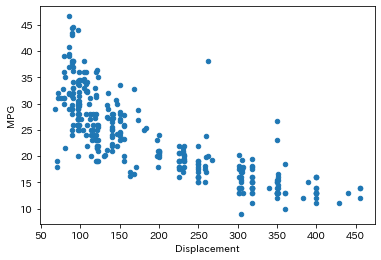

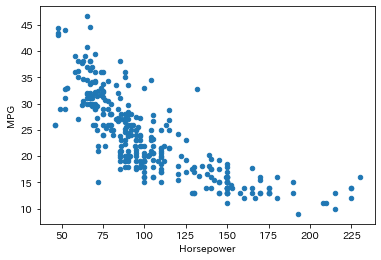

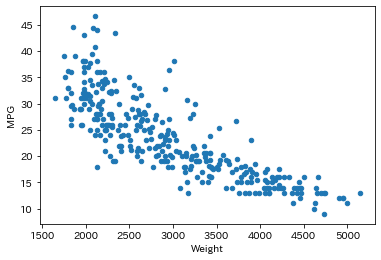

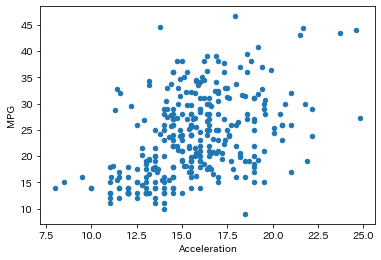

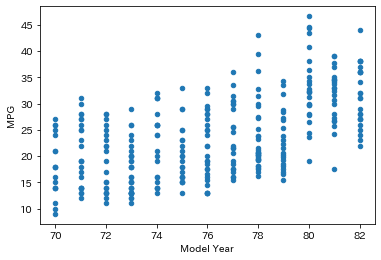

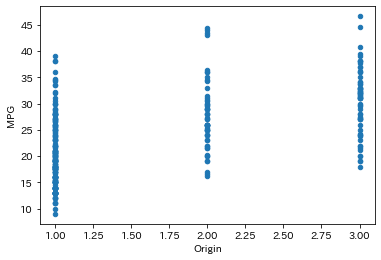

In [19]:
# JupyterLab上にグラフ描画するためのおまじない
%matplotlib inline

#各特徴量の列とMPG列の相関関係を示す散布図を描く
colname = train_val2.columns
for name in colname:
  train_val2.plot(kind = 'scatter', x = name, y = 'MPG')

In [20]:
#Displacementの外れ値
out_line1 = train_val2[(train_val2['Displacement'] >230) &(train_val2['MPG'] > 35)].index
#Accelerationの外れ値
out_line2 = train_val2[(train_val2['Acceleration'] <15) &(train_val2['MPG'] > 40)].index

print(out_line1, out_line2)

Int64Index([387], dtype='int64') Int64Index([329], dtype='int64')


In [21]:
#外れ値を削除する（特定の行）
train_val3 = train_val2.drop([387], axis = 0)

In [22]:
train_val4 = train_val3.drop([329], axis = 0)

In [23]:
#元の数「398」×訓練データの割合「0.8」=「318」
#「318」-削除した列「2」＝「316」
train_val4.shape

(316, 9)

4-2-2.特徴量の絞り込み

In [24]:
#特徴行列
#選択した重要特徴量で正しいか検証
train_val4.corr()

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
Unnamed: 0,1.000000,0.573531,-0.347233,-0.369222,-0.412615,-0.301661,0.313205,0.996577,0.199207
MPG,0.573531,1.000000,-0.775069,-0.810312,-0.790650,-0.829347,0.474396,0.567801,0.576746
Cylinders,-0.347233,-0.775069,1.000000,0.950374,0.835511,0.892392,-0.508062,-0.331883,-0.566448
Displacement,-0.369222,-0.810312,0.950374,1.000000,0.893920,0.933574,-0.545995,-0.351432,-0.618414
Horsepower,-0.412615,-0.790650,0.835511,0.893920,1.000000,0.862958,-0.686136,-0.405457,-0.471000
Weight,-0.301661,-0.829347,0.892392,0.933574,0.862958,1.000000,-0.424781,-0.288878,-0.589673
Acceleration,0.313205,0.474396,-0.508062,-0.545995,-0.686136,-0.424781,1.000000,0.312486,0.224896
Model Year,0.996577,0.567801,-0.331883,-0.351432,-0.405457,-0.288878,0.312486,1.000000,0.178723
Origin,0.199207,0.576746,-0.566448,-0.618414,-0.471000,-0.589673,0.224896,0.178723,1.000000


In [25]:
#MPG列との相関関係を調べる
train_cor = train_val4.corr()['MPG']
train_cor

Unnamed: 0      0.573531
MPG             1.000000
Cylinders      -0.775069
Displacement   -0.810312
Horsepower     -0.790650
Weight         -0.829347
Acceleration    0.474396
Model Year      0.567801
Origin          0.576746
Name: MPG, dtype: float64

In [26]:
#絶対値に変換
abs_cor = train_cor.map(abs)
abs_cor

Unnamed: 0      0.573531
MPG             1.000000
Cylinders       0.775069
Displacement    0.810312
Horsepower      0.790650
Weight          0.829347
Acceleration    0.474396
Model Year      0.567801
Origin          0.576746
Name: MPG, dtype: float64

In [27]:
# 降順に並べ替える
abs_cor.sort_values(ascending = False)

MPG             1.000000
Weight          0.829347
Displacement    0.810312
Horsepower      0.790650
Cylinders       0.775069
Origin          0.576746
Unnamed: 0      0.573531
Model Year      0.567801
Acceleration    0.474396
Name: MPG, dtype: float64

**特徴量重要度のグラフが高かったもの＝相関関係が低い**
**なぜ？？？**

In [28]:
col =['Weight', 'Displacement', 'Horsepower']
x = train_val4[col]
t = train_val4[['MPG']]

#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

4-2-3.標準化の実装

In [29]:
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

# 各列のデータを標準化してsc_xに代入
sc_x = sc_model_x.transform(x_train)
sc_x # 表示

array([[-0.97637702, -0.94202632, -0.98985818],
       [-1.12419916, -1.05918635, -1.04274682],
       [-0.55656212, -0.69794292, -0.43452751],
       [-0.88768373, -0.69794292, -0.48741615],
       [-0.96455125, -0.80533962, -0.64608205],
       [-1.06034   , -1.11776637, -0.91052523],
       [-0.884136  , -1.01036967, -0.88408091],
       [ 0.22157367,  0.55176408, -0.85763659],
       [ 1.10732398,  0.3662607 ,  0.14724747],
       [-1.00002856, -0.93226298, -0.91052523],
       [-0.44421729, -0.20001279,  0.27946906],
       [ 0.23458202,  1.05945755,  0.6496895 ],
       [-1.20697957, -1.11776637, -0.98985818],
       [-0.5991349 , -0.84439296, -0.48741615],
       [-1.39027903, -1.00060633, -1.36007862],
       [-1.34179337, -1.19587305, -1.04274682],
       [-0.79307755, -0.72723293, -0.19652866],
       [ 0.79748875,  0.55176408,  0.14724747],
       [ 1.38404704,  1.05945755,  0.94057699],
       [-1.10646051, -1.05918635, -1.38652294],
       [ 1.2669719 ,  1.05945755,  0.861

In [30]:
# array 型だと見づらいのでデータフレームに変換
tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)
# 平均値の計算
tmp_df.mean()
#結果はほぼ０

Weight          2.079465e-16
Displacement   -2.467162e-17
Horsepower     -1.026516e-16
dtype: float64

In [31]:
tmp_df.std()

Weight          1.00199
Displacement    1.00199
Horsepower      1.00199
dtype: float64

In [32]:
#正解データを標準化
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

In [33]:
#モデルの作成
model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression()

In [34]:
#検証データの標準化を忘れない
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)
# 標準化した検証データで決定係数を計算
model.score(sc_x_val, sc_y_val)

0.6754781966800236

In [35]:
def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    # 学習
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

In [36]:
x = train_val3.loc[ :, ['Weight', 'Displacement', 'Horsepower']]
t = train_val3[['MPG']]
s1,s2 = learn(x, t)
print(s1, s2)

0.7144606277778914 0.684668987490802


In [37]:
#Cylinders列を追加して検証
x = train_val3.loc[ :, ['Weight', 'Displacement', 'Horsepower','Cylinders']]
t = train_val3[['MPG']]
s1,s2 = learn(x, t)
print(s1, s2)

0.716437940863518 0.6765610506100268


**→検証データが下がったので不採用**

4-2-4.多項式特徴量、交互作用特徴量を追加

In [38]:
#コード[55]のCylinders列削除
x = x.drop('Cylinders', axis = 1)
x.head(3)

,Weight,Displacement,Horsepower
64,4135,318.0,150.0
55,1834,97.0,60.0
317,2188,97.0,78.0


In [39]:
#多項式特徴量 追加
x['Weight2']  = x['Weight'] **2

#再学習
s1, s2 = learn(x, t)
print(s1, s2)

0.7379970874651185 0.7272442049922678


In [40]:
x['Displacement2']  = x['Displacement'] **2

#再学習
s1, s2 = learn(x, t)
print(s1, s2)

0.7622085359799569 0.709289479971016


In [41]:
x['Horsepower2']  = x['Horsepower'] **3

#再学習
s1, s2 = learn(x, t)
print(s1, s2)

0.7647704880664048 0.7219267150210122


In [42]:
#交互作用特徴量 追加
x['Weight * Displacement'] = x['Weight'] * x['Displacement']

s1, s2 = learn(x, t)
print(s1, s2)

0.766903872872472 0.7198368443965426


In [43]:
#不採用
x = x.drop('Weight * Displacement', axis = 1)
x.head(3)

,Weight,Displacement,Horsepower,Weight2,Displacement2,Horsepower2
64,4135,318.0,150.0,17098225,101124.0,3375000.0
55,1834,97.0,60.0,3363556,9409.0,216000.0
317,2188,97.0,78.0,4787344,9409.0,474552.0


In [44]:
x['Weight * Horsepower'] = x['Weight'] * x['Horsepower']
x.head(2)

#再学習
s1, s2 = learn(x, t)
print(s1, s2)

0.7648534716228494 0.7279087831120483


In [45]:
# 訓練データと検証データを合わせて再学習させるので
# 再度、標準化する
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression()

4-2-5.特徴量と正解データの分割

In [46]:
test2 = test.fillna(train_val.mean()) # 欠損値を平均値で補完
x_test = test2.loc[ :, ['Weight','Displacement', 'Horsepower'] ]
y_test = test2[['MPG']]

x_test['Weight2']  = x_test['Weight'] **2
x_test['Displacement2'] = x_test['Displacement'] ** 2
x_test['Horsepower2']  = x_test['Horsepower'] **3

x_test['Weight * Horsepower'] = x_test['Weight'] * x_test['Horsepower']

sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)

In [47]:
#モデルの再学習
model.score(sc_x_test, sc_y_test)

0.7280011663984411

##5.学習モデルの選択

チートシートにて学習モデルの選択を行う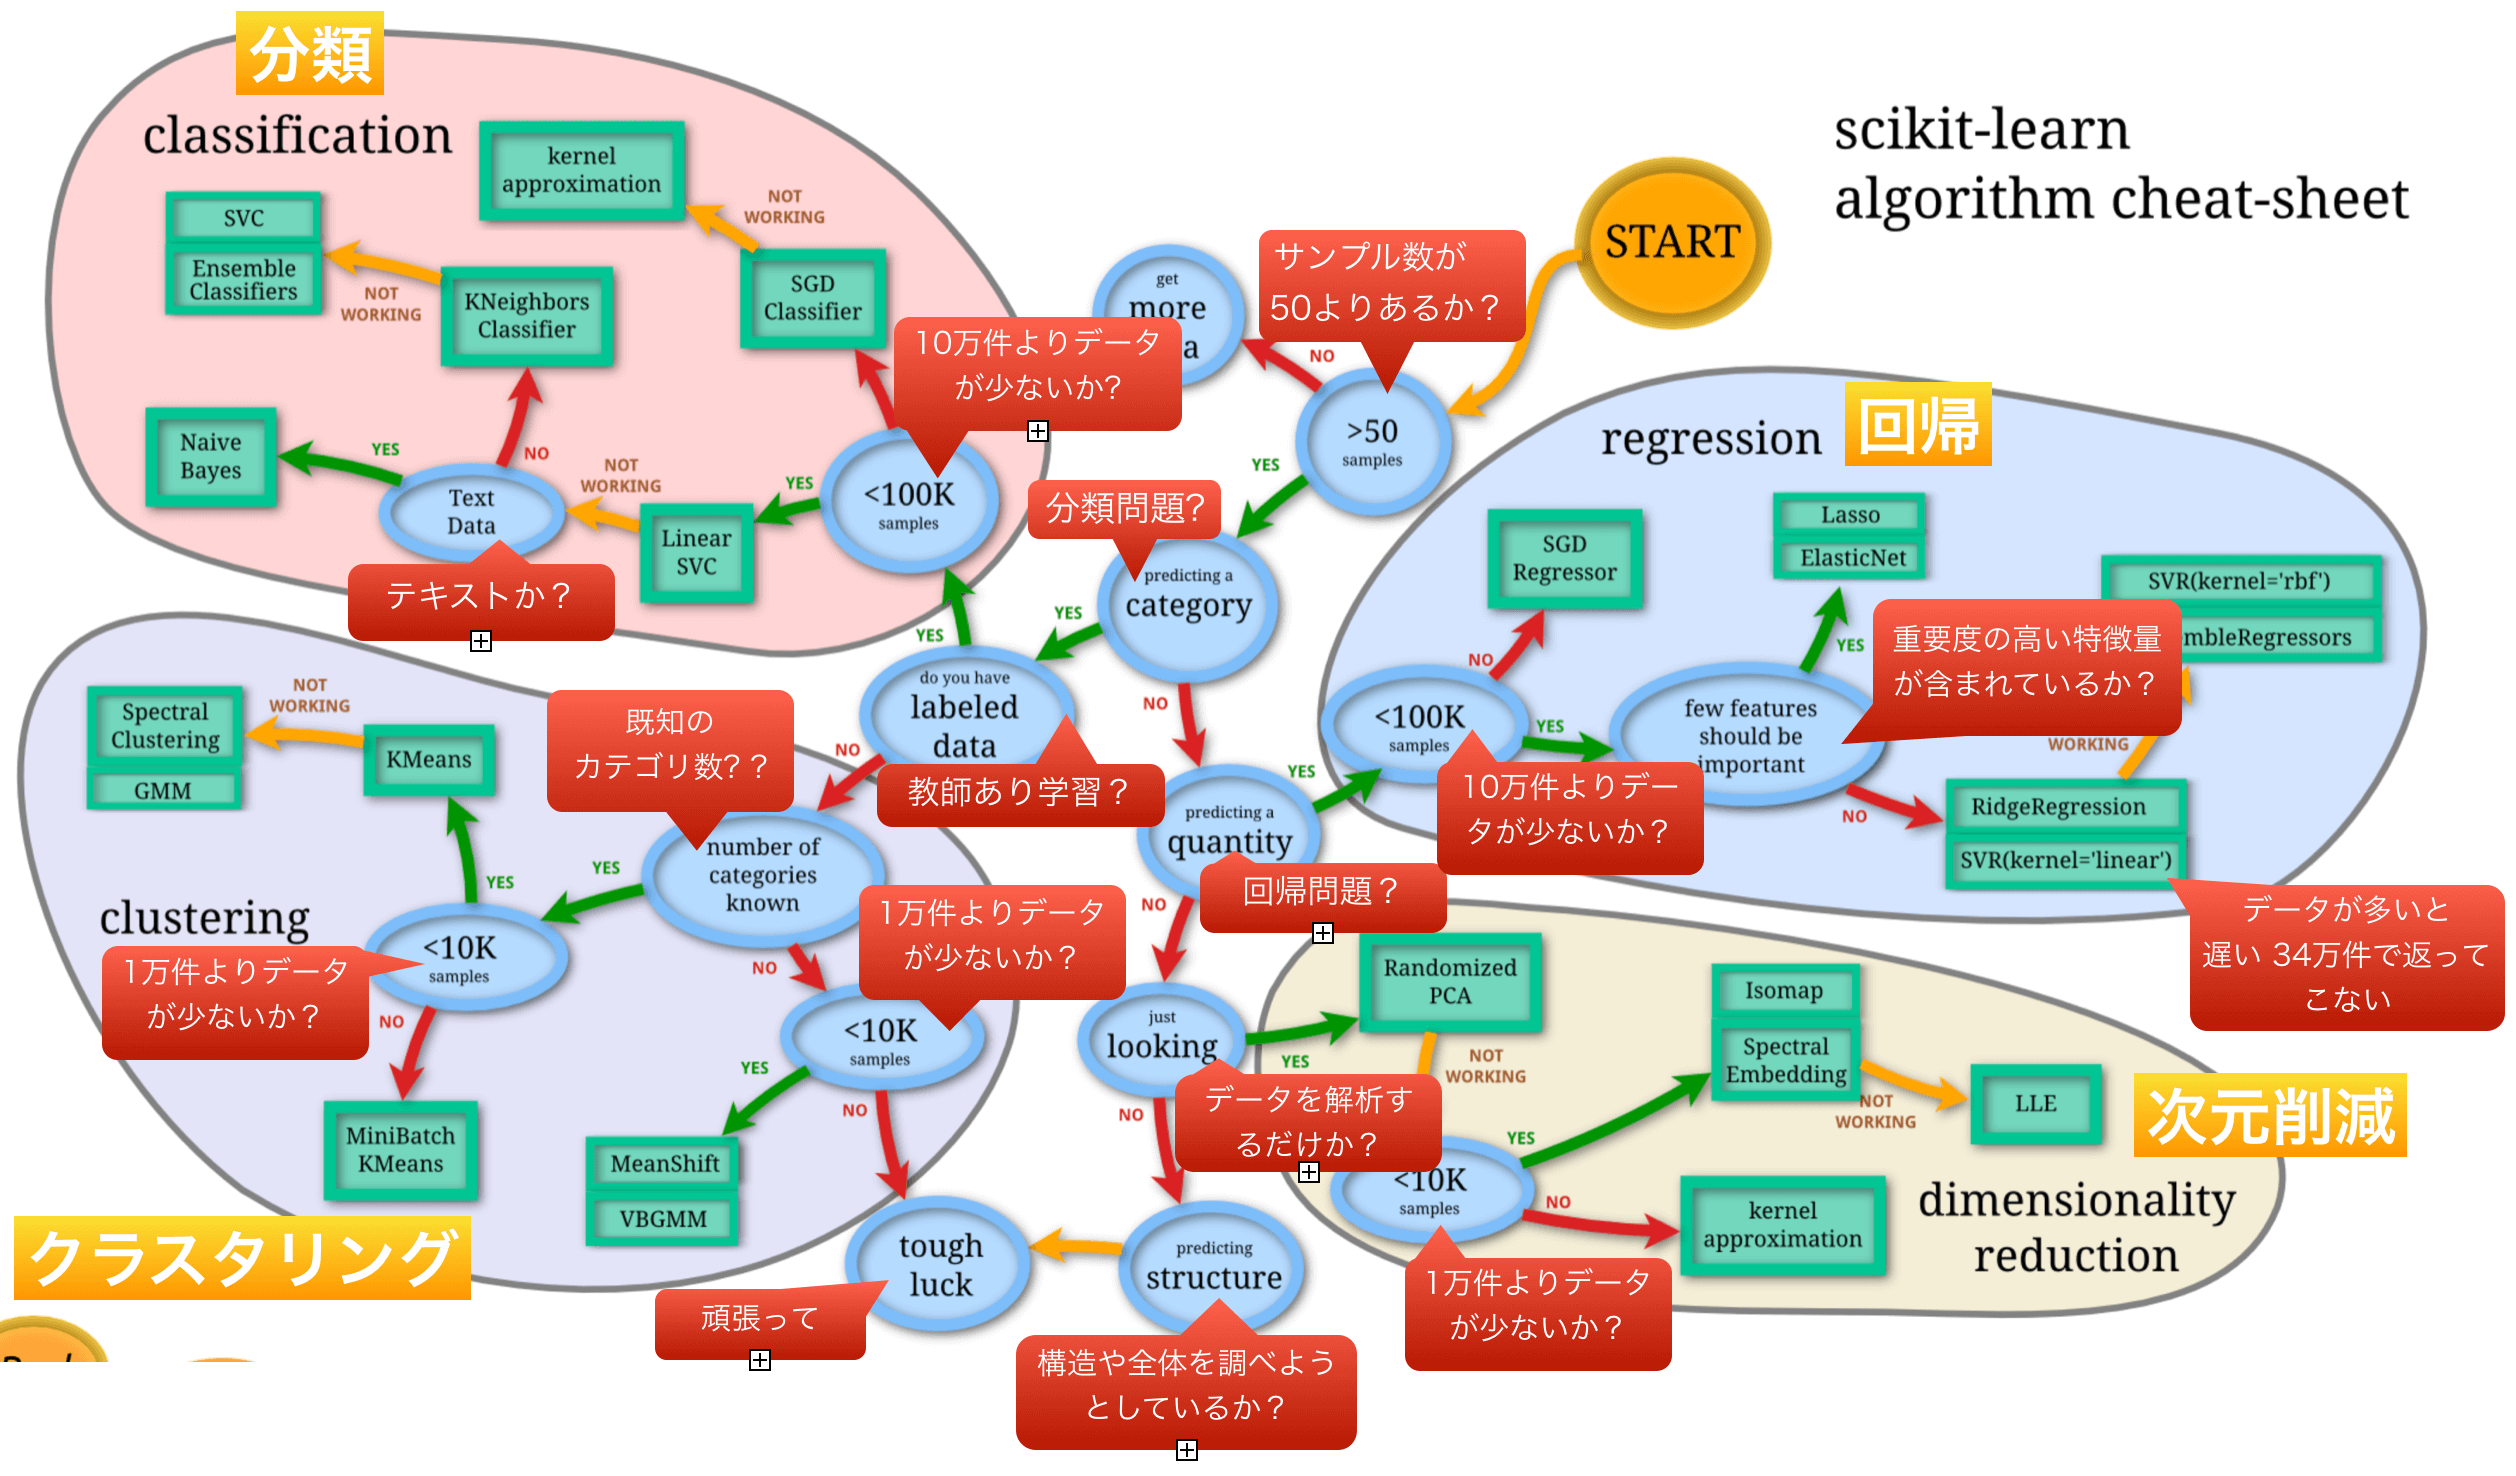

In [48]:
#以下、重要度の高い特徴量があるか確認。
col =['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
x = train_val2[col]
t = train_val2[['MPG']]

In [49]:
x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

In [50]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_val, y_val)

0.806334434623715

In [51]:
#特徴量重要度の確認
print(model.coef_)

[[-0.05709063  0.01202459 -0.01320583 -0.00628988  0.09666074  0.76885233
   1.49160792]]


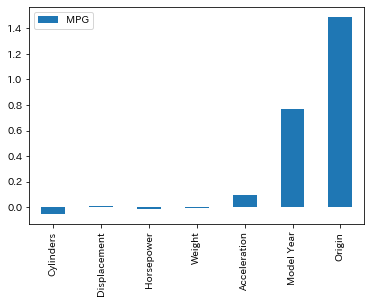

In [52]:
#グラフにて描写
df3 = pd.DataFrame(model.coef_.T,columns=['MPG'],index=['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin'])

df3.plot.bar()

【結果】重要度の高い特徴量が存在するため、**「ラッソ回帰」**を選択

##6.選択された学習モデルで学習

In [53]:
#使えそうなモジュールをインポート
import pandas as pd

from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [54]:
# 標準化
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc2 = StandardScaler()
sc_t = sc2.fit_transform(t)

In [55]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2, include_bias = False)
pf_x = pf.fit_transform(sc_x) # 2乗列と交互作用項の追加
pf_x.shape # 行数と列数

(318, 35)

In [56]:
pf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x5^2',
 'x5 x6',
 'x6^2']

In [57]:
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(pf_x,
    sc_t, test_size = 0.3, random_state = 0)
model2 = LinearRegression()
model2.fit(x_train, y_train)

print(model2.score(x_train, y_train)) # 訓練データの決定係数
model2.score(x_test, y_test) # テストデータの決定係数

0.8991632668196148


0.8537519610094514

In [69]:
#ラッソ回帰インポート
from sklearn.linear_model import Lasso

x_train, x_test, y_train, y_test = train_test_split(pf_x,
    sc_t, test_size = 0.3, random_state = 0)

# ラッソ回帰のモデル作成（alphaは正則化項につく定数）
model2 = Lasso(alpha = 0.1)
model2.fit(x_train, y_train)

print(model2.score(x_train, y_train)) # 訓練データの決定係数
print(model2.score(x_test, y_test)) # テストデータの決定係数

0.8166457520887729
0.7920755437541966


### →手作業で追加するより早い！高い！

In [70]:
weight = model2.coef_ # 係数抜き出す
# 見やすいようにシリーズ変換
pd.Series(weight)
#0,1,4列目は不要

0    -0.000000
1    -0.000000
2    -0.114873
3    -0.487993
4     0.000000
5     0.259550
6     0.090596
7    -0.000000
8     0.000000
9     0.000000
10    0.000000
11   -0.000000
12   -0.000000
13   -0.000000
14    0.000000
15    0.000000
16    0.000000
17   -0.000000
18   -0.000000
19   -0.000000
20    0.000000
21    0.000000
22   -0.000000
23   -0.000000
24   -0.000000
25    0.000000
26   -0.000000
27   -0.010853
28   -0.000000
29    0.052586
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
dtype: float64

##7.正解率または決定係数の表示

In [60]:
#追加列がほとんど０に近い為、無視。
col2 =['Horsepower','Weight','Model Year','Origin']
x2 = train_val4[col2]
t2 = train_val4[['MPG']]

In [61]:
x2.head(5)

,Horsepower,Weight,Model Year,Origin
64,150.0,4135,72,1
55,60.0,1834,71,2
317,78.0,2188,80,2
102,46.0,1950,73,2
358,74.0,2635,81,3


In [62]:
x_train, sc_x_val2, y_train, sc_y_val2 = train_test_split(x2, t2,
    test_size = 0.2, random_state = 0)

In [63]:
#モデルの初期化と学習
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [64]:
print(model2.score(sc_x_val2, sc_y_val2))

0.7952679851334574


馬力：180
車種：3400
発表年：70
どこの国産か:1

In [65]:
kensyou = [[180,3400,70,1]]
model2.predict(kensyou)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[15.05513888]])

馬力：133 車種：3400 発表年：77 どこの国産か:2

In [66]:
kensyou = [[133,3400,77,2]]
model2.predict(kensyou)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[22.0538267]])

馬力：65 車種：2000 発表年：80 どこの国産か:3

In [67]:
kensyou = [[65,2000,80,3]]
model2.predict(kensyou)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[33.95286118]])

##8.学習後のモデルを保存

In [68]:
import pickle
with open('auto_mpg.pkl',"wb") as f:
    pickle.dump(model,f)